In [30]:
import pandas as pd
import math
import numpy as np
import os

import random
import csv
import statistics
from matplotlib import pyplot as plt
from sklearn.utils import resample

%matplotlib inline

os.getcwd()

'C:\\Users\\Kooroshoo\\Desktop\\data_hw1'

In [3]:
data1 = pd.read_csv("data_ex1.csv", header= None)

In [4]:
data1_sort = data1.sort_values(by = 0).reset_index()
data1_sort = data1_sort.drop(['index'], axis = 1)
def median_(data):
    if((data.shape[0]/2)%2==0):
        median_indexes = [int(data.shape[0]/2),int(data.shape[0]/2+1)]
        median = sum(data[0][median_indexes])/2
    else:
        median_indexes = [int(data.shape[0]/2)]
        median = data[0][median_indexes]
#     print(median_indexes)
    return(median)

In [5]:
data1_median = median_(data1_sort)
print("The median value for the given samples is : ", round(data1_median,3))

The median value for the given samples is :  0.403


In [6]:
def CI95(data):
    n = data.shape[0]
    low = round((0.5*n)-(0.98*math.sqrt(n)))
    high = round(1+(0.5*n)+(0.98*math.sqrt(n)))
#     print(low-1,high-1)
    return [data[0][low-1], data[0][high-1]]

In [7]:
print("Solution 1.1")
print("The confidence interval values for the median of given samples is : ", CI95(data1_sort))

Solution 1.1
The confidence interval values for the median of given samples is :  [0.383854469876595, 0.41665078181696]


In [8]:
def mean_CI(data, CI):
    n = data.shape[0]
    mean_ = sum(data[0])/n
    # print(n, mean_)
    var_ = sum((data[0]-mean_)**2)/(n-1)
    sd_ = math.sqrt(var_)
    # print(var_, sd_)
    if(CI==0.95):
        low = mean_-(1.96*(sd_/math.sqrt(n)))
        high = mean_+(1.96*(sd_/math.sqrt(n)))
    elif (CI==0.99):
        low = mean_-(2.58*(sd_/math.sqrt(n)))
        high = mean_+(2.58*(sd_/math.sqrt(n)))
    return [mean_, low, high]

To calculate the mean we have used the asymptotic case

In [9]:
print("Solution 1.2 - 95% CI")
print("[mean,               lower CI,            Upper CI]")
mean_CI(data1, 0.95)

Solution 1.2 - 95% CI
[mean,               lower CI,            Upper CI]


[0.4102045805827238, 0.39886862084329877, 0.4215405403221488]

In [10]:
print("Solution 1.2 - 99% CI")
print("[mean,               lower CI,            Upper CI]")
mean_CI(data1, 0.99)

Solution 1.2 - 99% CI
[mean,               lower CI,            Upper CI]


[0.4102045805827238, 0.39528275602776636, 0.42512640513768124]

In [12]:
data2 = pd.read_csv("data_ex2.csv", header= None)

In [13]:
print("Solution 2.1")
df2_row1 = data2[0:1].T
mean_df2_row1 = mean_CI(df2_row1, 0.95)
print("[mean,               lower CI,            Upper CI]")
print(mean_df2_row1)

Solution 2.1
[mean,               lower CI,            Upper CI]
[3.1750482140829686, 2.9374884882508945, 3.4126079399150426]


Out of 6000 mean of 4016 records fall within the CI of first row.

In [14]:
df2 = data2[1:]
df2['mean'] = df2.mean(axis = 1)
print("Solution 2.2")
print(df2['mean'].loc[(df2['mean'].values >= mean_df2_row1[1]) & (df2['mean'].values <= mean_df2_row1[2])].count())

Solution 2.2
4016


D:\Users\Kooroshoo\Anaconda3\envs\Python 3.6\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
data3 = pd.read_csv("data_ex3.csv", header= None)

In [18]:
print("Solution 3.1")
def CoV(data, i):
    n = data.shape[0]
    mean_ = sum(data[i])/n
    # print(n, mean_)
    var_ = sum((data[i]-mean_)**2)/(n-1)
    sd_ = math.sqrt(var_)
    cov = sd_/mean_
    return cov, mean_
COV_, m = CoV(data3, 0)

def JFI(data, i):
    j = ((data[i].sum())**2)/(data.shape[0]*(data[i]**2).sum())
    return j
JFI_ = JFI(data3, 0)

def lorenz_gap(data, i):
    n = data.shape[0]
    mean_ = sum(data[i])/n
    MAD = data[i].mad()
    gap = MAD/(2*mean_)
    return gap
lor_gap = lorenz_gap(data3, 0)

print("CoV = ", COV_)
print("Jain's Fairness Index = ", JFI_)
print("Lorenz curve gap = ", lor_gap)

Solution 3.1
CoV =  1.001469136252604
Jain's Fairness Index =  0.4997664716207735
Lorenz curve gap =  0.3623044470759574


Solution 3.2 - Lorenz Curve Plot


(array([155.,  94.,  66.,  69.,  29.,  25.,  16.,  19.,  11.,   4.,   1.,
          3.,   2.,   0.,   3.,   1.,   0.,   0.,   0.,   2.]),
 array([7.34675010e-03, 1.43734079e+00, 2.86733483e+00, 4.29732887e+00,
        5.72732291e+00, 7.15731695e+00, 8.58731099e+00, 1.00173050e+01,
        1.14472991e+01, 1.28772931e+01, 1.43072871e+01, 1.57372812e+01,
        1.71672752e+01, 1.85972693e+01, 2.00272633e+01, 2.14572573e+01,
        2.28872514e+01, 2.43172454e+01, 2.57472395e+01, 2.71772335e+01,
        2.86072275e+01]),
 <a list of 20 Patch objects>)

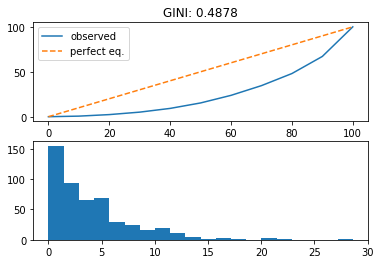

In [27]:
print("Solution 3.2 - Lorenz Curve Plot")
def G(v):
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, yvals, gini_val

v = np.array(data3)
bins, result, gini_val = G(v)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(bins, result, label="observed")
plt.plot(bins, bins, '--', label="perfect eq.")
plt.title("GINI: %.4f" %(gini_val))
plt.legend()
plt.subplot(2, 1, 2)
plt.hist(v, bins=20)

In [31]:
def bootStrap(data, CI = 0.95):
    R = math.ceil(2 * (25 / (1-CI)))-1
    df3_99 = data.copy(deep= True)
    df3_99 = df3_99.sort_values([0], ascending = True).reset_index(drop = True)
    for i in range(1, R+1):
        boot = resample(df3_99[0], replace=True, n_samples=df3_99.shape[0], random_state=i)
        df3_99[i] = boot.sort_values().reset_index(drop = True).values
    df3_99.drop([0], axis = 1, inplace= True)
    cov_, mean_, jfi_, lor_gap_, std_dev_ = [], [], [], [], []
    for i in range(1, R+1):
        COV, mean = CoV(df3_99, i)
        jfi_.append(JFI(df3_99, i))
        lor_gap_.append(lorenz_gap(df3_99, i))
        cov_.append(COV)
        mean_.append(mean)
        std_dev_.append(COV*mean)
    df3_99_boot = df3_99.T.copy(deep = True)
    df3_99_boot['mean'] = mean_
    df3_99_boot['std_dev'] = std_dev_
    df3_99_boot['jfi'] = jfi_
    df3_99_boot['lor_gap'] = lor_gap_
    print('Statistics with bootstrap confidence interval:', CI) 
    temp = df3_99_boot.sort_values(['mean'], ascending = True, inplace = False).reset_index(drop = True)
    print('mean is [{}, {}]'.format(temp['mean'][24], temp['mean'][R-25]))
    temp = df3_99_boot.sort_values(['std_dev'], ascending = True, inplace = False).reset_index(drop = True)
    print('Standard Deviation is [{}, {}]'.format(temp['std_dev'][24], temp['std_dev'][R-25]))
    temp = df3_99_boot.sort_values(['jfi'], ascending = True, inplace = False).reset_index(drop = True)
    print('Jain''s Fairness Index is [{}, {}]'.format(temp['jfi'][24], temp['jfi'][R-25]))
    temp = df3_99_boot.sort_values(['lor_gap'], ascending = True, inplace = False).reset_index(drop = True)
    print('Lorenz curve gap is [{}, {}]'.format(temp['lor_gap'][24], temp['lor_gap'][R-25]))

In [32]:
print("Solution 3.3")
bootStrap(data3)
bootStrap(data3, 0.99)

Solution 3.3
Statistics with bootstrap confidence interval: 0.95
mean is [3.6942580181736577, 4.441715095481477]
Standard Deviation is [3.5538741466814567, 4.591299596017268]
Jains Fairness Index is [0.4594111544015242, 0.5448463935299482]
Lorenz curve gap is [0.34142416873930176, 0.38451457470013256]
Statistics with bootstrap confidence interval: 0.99
mean is [3.600858140036771, 4.551081229138013]
Standard Deviation is [3.4278292973037163, 4.7871405640242735]
Jains Fairness Index is [0.44575956869416966, 0.5611767152289968]
Lorenz curve gap is [0.33379382478974945, 0.3915404203309718]


In [33]:
print("Solution 3.4")
def mean_CI2(data, i, CI):
    n = data.shape[0]
    mean_ = sum(data[i])/n
    # print(n, mean_)
    var_ = sum((data[i]-mean_)**2)/(n-1)
    sd_ = math.sqrt(var_)
    # print(var_, sd_)
    if(CI==0.95):
        low = mean_-(1.96*(sd_/math.sqrt(n)))
        high = mean_+(1.96*(sd_/math.sqrt(n)))
    elif (CI==0.99):
        low = mean_-(2.58*(sd_/math.sqrt(n)))
        high = mean_+(2.58*(sd_/math.sqrt(n)))
    return [low, high]
boot_mean_CI_95 = mean_CI2(data3, 0, 0.95)
boot_mean_CI_99 = mean_CI2(data3, 0, 0.99)
print("Asymptotic mean CI at 95% = ", boot_mean_CI_95)
print("Asymptotic mean CI at 99% = ", boot_mean_CI_99)

Solution 3.4
Asymptotic mean CI at 95% =  [3.7255847131058872, 4.442610450106189]
Asymptotic mean CI at 99% =  [3.6121775812333903, 4.5560175819786854]


The mean for the bootstrap method and asymptotic method are quite similar

In [34]:
data4 = pd.read_csv("data_ex4.csv", header= None)

In [35]:
print("Solution 4.1")
bootStrap(data4)
bootStrap(data4, .99)

Solution 4.1
Statistics with bootstrap confidence interval: 0.95
mean is [98.15345774280443, 12028.567062933795]
Standard Deviation is [1070.6326309834556, 146214.2732418629]
Jains Fairness Index is [0.0021157032245058146, 0.015949919359740748]
Lorenz curve gap is [0.8602782176742729, 0.9866989960496751]
Statistics with bootstrap confidence interval: 0.99
mean is [63.02470424147407, 15901.078784220806]
Standard Deviation is [388.1523336454907, 168632.49923243484]
Jains Fairness Index is [0.0020611348558786657, 0.02949943574692878]
Lorenz curve gap is [0.8287108133383393, 0.988690696138274]


The mean for the bootstrap method and asymptotic method are extremely different for lower bounds

In [36]:
print("Solution 4.2")
from sklearn.utils import resample
boot4 = resample(data4[0], replace=True, n_samples=data4.shape[0], random_state=1)
data4[1] = boot4.values
print("Asymptotic mean CI at 95% = ", mean_CI2(data4, 0, 0.95))
print("Asymptotic mean CI at 99% = ", mean_CI2(data4, 0, 0.99))

Solution 4.2
Asymptotic mean CI at 95% =  [-3226.47838441411, 11613.131044854912]
Asymptotic mean CI at 99% =  [-5573.559467614823, 13960.212128055626]


In [37]:
print("Solution 4.3")
data4['nat_log'] = np.log(data4[0])
print("mean CI at 95% for natural log transformed data = ", mean_CI2(data4, 'nat_log', 0.95))
print("mean CI at 99% for natural log transformed data = ", mean_CI2(data4, 'nat_log', 0.99))

Solution 4.3
mean CI at 95% for natural log transformed data =  [0.5924290461995133, 1.0491192984425697]
mean CI at 99% for natural log transformed data =  [0.5201974246712748, 1.121350919970808]


In [39]:
data5 = pd.read_csv("data_ex5.csv", header= None)
data5 = data5.T

In [40]:
print("Solution 5.1")
def CI_binom(data, CI):
    n = data.shape[0]
    suc = (data[0].value_counts()[1])/n
    fail = 1-suc
#     print(n, suc, fail)
    if(CI==0.95):
        low = suc - (1.96 * math.sqrt((suc*fail)/n))
        high = suc + (1.96 * math.sqrt((suc*fail)/n))
    elif (CI==0.99):
        low = suc - (2.58 * math.sqrt((suc*fail)/n))
        high = suc + (2.58 * math.sqrt((suc*fail)/n))
    return [low, high]
print("CI at 95% = ", CI_binom(data5, .95))
print("CI at 99% = ",CI_binom(data5, .99))

Solution 5.1
CI at 95% =  [0.10450182934991514, 0.14549817065008486]
CI at 99% =  [0.09801771414427607, 0.15198228585572393]


In [41]:
df5 = data5[:15]
print("Solution 5.2")
print("Using Rule of three - for when no successes are observed - CI= ", [0, 3/df5.shape[0]])

Solution 5.2
Using Rule of three - for when no successes are observed - CI=  [0, 0.2]
